# Predicting Type of Facebook Post

In [1]:
'''
Motivation: We are hoping to predict the type of facebook posts (video, photo, link, status) which is the response variable
based on different explanatory variables such as number of reactions, number of comments, number of shares, 
number of likes, loves, wows, hahas, sad and angry. This can be beneficial for advertising companies that aim to determine 
the types of posts their consumers would be responsive to. Therefore helping them decide how to advertise. 
We will use classification to predict the type of Facebook post.

Dataset: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand
This dataset has Thailand Facebook post information from ten Thai fashion and cosmetics retail sellers. 
The purpose of this dataset was intended to analyze the variability of consumer engagement, highlighting the changes induced by the use of Facebook Live. 
'''

'\nMotivation: We are hoping to predict the type of facebook posts (video, photo, link, status) which is the response variable\nbased on different explanatory variables such as number of reactions, number of comments, number of shares, \nnumber of likes, loves, wows, hahas, sad and angry. This can be beneficial for advertising companies that aim to determine \nthe types of posts their consumers would be responsive to. Therefore helping them decide how to advertise. \nWe will use classification to predict the type of Facebook post.\n\nDataset: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand\nThis dataset has Thailand Facebook post information from ten Thai fashion and cosmetics retail sellers. \nThe purpose of this dataset was intended to analyze the variability of consumer engagement, highlighting the changes induced by the use of Facebook Live. \n'

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat
import sklearn as sk
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [3]:
# Import the data
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5a7f0d32e3f74da881228669190705da = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='13TFOZmPXP0NLbg1MQiX2Kp5vQbZtZ2foWBfxJ_UooG6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_5a7f0d32e3f74da881228669190705da.get_object(Bucket='ds320project1-donotdelete-pr-ogedj9usgansvg',Key='Live.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Data Cleaning/Exploratory Data Analysis

In [4]:
# Shape of data
df.shape

# 7,050 rows, 16 attributes -- last 4 columns are empty

(7050, 16)

In [5]:
# Delete status_id column (not needed) and last 4 columns because they are blank
df.drop(['status_id', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
# View the data frame to see how it changed
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [6]:
# Data types
df.dtypes

#all numeric except for status_type and status_published are categorical

status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [7]:
# Statistical Summary of attributes
df.describe(include='all')

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
unique,4,6913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,photo,3/20/2018 1:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4288,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,NaN,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
'''
Analysis:
There are 7050 total instances.
The top status_type (occurs most often) is photo.
There are 6913 unique dates/times for status published, which means there were some instances that occured at the exact same time.
The mean is a lot higher than the median for all of the numerical data, which suggests there might be some high outliers.
Some of the max values, especially for num_comments, is extremely high (over 20,000) relative to the other data.
The minimum value is 0 for all of the numerical attributes.
'''

'\nAnalysis:\nThere are 7050 total instances.\nThe top status_type (occurs most often) is photo.\nThere are 6913 unique dates/times for status published, which means there were some instances that occured at the exact same time.\nThe mean is a lot higher than the median for all of the numerical data, which suggests there might be some high outliers.\nSome of the max values, especially for num_comments, is extremely high (over 20,000) relative to the other data.\nThe minimum value is 0 for all of the numerical attributes.\n'

In [9]:
# More description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 606.0+ KB


In [10]:
# Find number of instances for each category in status_type
df['status_type'].value_counts()

# We have some data imbalance  -- Could maybe combine status and link?

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

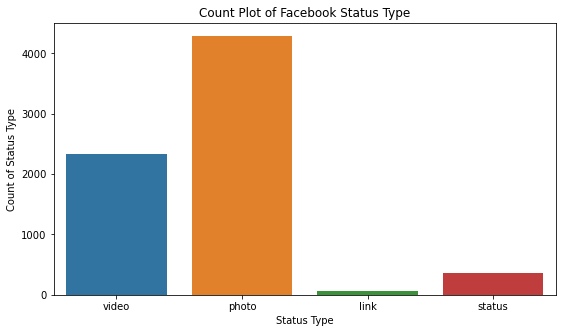

In [11]:
# Count plot to show number of instances for each category in status type
plt.figure(figsize=(9,5)) #Set plot size

sb.countplot(x='status_type', data=df)

plt.title('Count Plot of Facebook Status Type') # add a title to the plot
plt.ylabel('Count of Status Type') # add y-label
plt.xlabel('Status Type') # add x-label

plt.show()

In [12]:
# Check for missing values
df.isnull().sum()

#There are no missing values

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [13]:
#Drop duplicate rows
df.drop_duplicates()
print(df.shape)   # Check shape of data frame

#No duplicate rows

(7050, 11)


In [14]:
#convert date/time column (status_published) into 2 different columns for date and time
df['status_published'] = pd.to_datetime(df['status_published'])
df['date_published'] = df['status_published'].dt.date
df['time_published'] = df['status_published'].dt.time
print(df[['status_published','date_published','time_published']])

        status_published date_published time_published
0    2018-04-22 06:00:00     2018-04-22       06:00:00
1    2018-04-21 22:45:00     2018-04-21       22:45:00
2    2018-04-21 06:17:00     2018-04-21       06:17:00
3    2018-04-21 02:29:00     2018-04-21       02:29:00
4    2018-04-18 03:22:00     2018-04-18       03:22:00
...                  ...            ...            ...
7045 2016-09-24 02:58:00     2016-09-24       02:58:00
7046 2016-09-23 11:19:00     2016-09-23       11:19:00
7047 2016-09-21 23:03:00     2016-09-21       23:03:00
7048 2016-09-20 00:43:00     2016-09-20       00:43:00
7049 2016-09-10 10:30:00     2016-09-10       10:30:00

[7050 rows x 3 columns]


In [15]:
#drop original status_published column
df.drop("status_published", axis = 1, inplace=True)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published
0,video,529,512,262,432,92,3,1,1,0,2018-04-22,06:00:00
1,photo,150,0,0,150,0,0,0,0,0,2018-04-21,22:45:00
2,video,227,236,57,204,21,1,1,0,0,2018-04-21,06:17:00
3,photo,111,0,0,111,0,0,0,0,0,2018-04-21,02:29:00
4,photo,213,0,0,204,9,0,0,0,0,2018-04-18,03:22:00


In [16]:
#number of rows for each date  -- sort by number
print(df['date_published'].groupby(df['date_published']).value_counts().sort_values())

# 6-7-2018 has the highest number of occurances -- it looks like the summer months in later years have more occurances, which makes sense

date_published  date_published
2016-09-22      2016-09-22         1
2014-08-21      2014-08-21         1
2014-08-14      2014-08-14         1
2014-08-06      2014-08-06         1
2014-07-28      2014-07-28         1
                                  ..
2018-06-08      2018-06-08        35
2018-05-25      2018-05-25        38
2018-06-11      2018-06-11        42
2018-06-09      2018-06-09        43
2018-06-07      2018-06-07        51
Name: date_published, Length: 1352, dtype: int64


In [17]:
#Min and max of date_published
print(df['date_published'].min())
print(df['date_published'].max())

#Data ranges from July 15, 2012 to June 13, 2018

2012-07-15
2018-06-13


In [18]:
#Number of rows for each time of day
df['time_published'].groupby(df['time_published']).value_counts().sort_values()

#ranges from midnight(00:00:00) to 11:59pm (23:59:00) 
# It seems like 1pm and 7pm are most popular times to post

time_published  time_published
11:16:00        11:16:00           1
11:27:00        11:27:00           1
19:36:00        19:36:00           1
19:35:00        19:35:00           1
19:31:00        19:31:00           1
                                  ..
01:06:00        01:06:00          33
07:06:00        07:06:00          33
07:05:00        07:05:00          33
01:07:00        01:07:00          34
01:08:00        01:08:00          35
Name: time_published, Length: 1050, dtype: int64

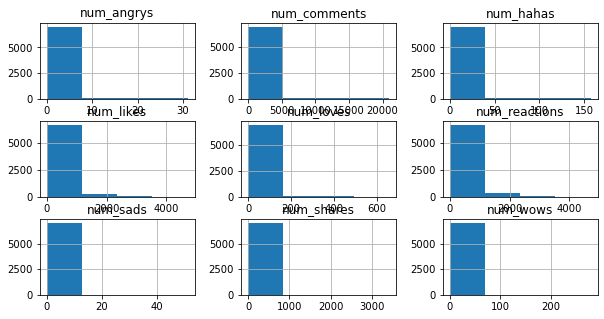

In [19]:
# Histograms for all numerical attributes
df.hist(figsize=(10,5), bins=4)
plt.show()

#All of the attributes seem to be skewed to the right. Normalizing the data will help deal with this issue.

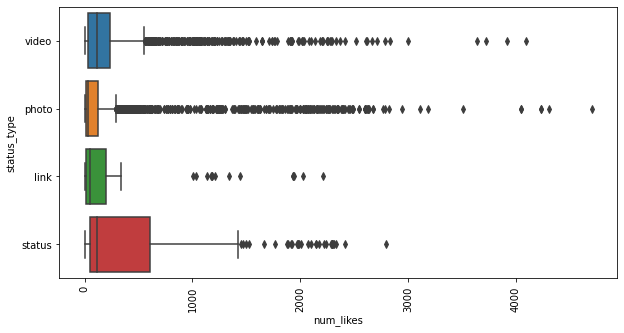

In [20]:
#Boxplot using X=num_likes and Y=status_type
plt.figure(figsize=(10,5))
sb.boxplot(x="num_likes",y="status_type",data=df)
plt.xticks(rotation=90)

plt.show()
#lots of high outliers

In [21]:
# Change status_type column to numbers (photo=1, video=2, status=3, link=4)
df.status_type[df.status_type== 'photo']=1
df.status_type[df.status_type== 'video']=2
df.status_type[df.status_type== 'status']=3
df.status_type[df.status_type== 'link']=4
print(df)

     status_type  num_reactions  num_comments  num_shares  num_likes  \
0              2            529           512         262        432   
1              1            150             0           0        150   
2              2            227           236          57        204   
3              1            111             0           0        111   
4              1            213             0           0        204   
...          ...            ...           ...         ...        ...   
7045           1             89             0           0         89   
7046           1             16             0           0         14   
7047           1              2             0           0          1   
7048           1            351            12          22        349   
7049           1             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys date_published  \
0            92         3          1         1           0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [22]:
#Check data types
df.dtypes

status_type       object
num_reactions      int64
num_comments       int64
num_shares         int64
num_likes          int64
num_loves          int64
num_wows           int64
num_hahas          int64
num_sads           int64
num_angrys         int64
date_published    object
time_published    object
dtype: object

In [23]:
# Change status_type to numeric
df['status_type'] = df['status_type'].astype(int)
df.dtypes

status_type        int64
num_reactions      int64
num_comments       int64
num_shares         int64
num_likes          int64
num_loves          int64
num_wows           int64
num_hahas          int64
num_sads           int64
num_angrys         int64
date_published    object
time_published    object
dtype: object

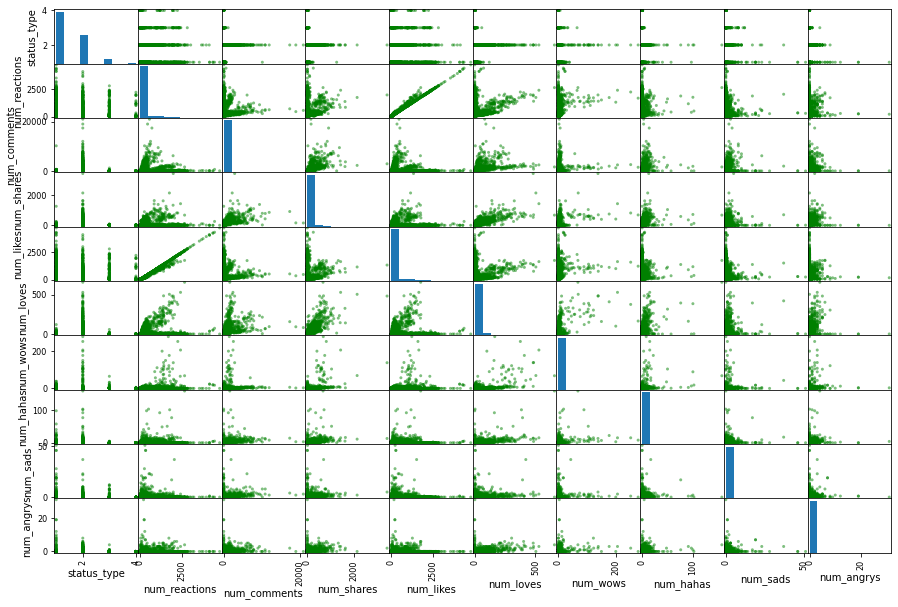

In [24]:
# Generate scatterplots for all numeric data
pd.plotting.scatter_matrix(df, figsize=[15,10], color = 'green')
plt.show()

In [25]:
# Pearson correlation coefficient for status_type and num_reactions
pearson_coef, p_value = stat.pearsonr(df['status_type'], df['num_reactions'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.1459546811322806  with a P-value of P = 7.173109803771956e-35


In [26]:
# This is a fairly low correlation coefficient with a very low p-value so it is significant

In [27]:
#Correlation matrix
print("Correlation:")
print(df.corr())

#There is a very high correclation between num_reactions and num_likes (0.99)
#High correlation between num_shares and num_loves (0.82)

Correlation:
               status_type  num_reactions  num_comments  num_shares  \
status_type       1.000000       0.145955      0.199587    0.241168   
num_reactions     0.145955       1.000000      0.150843    0.250723   
num_comments      0.199587       0.150843      1.000000    0.640637   
num_shares        0.241168       0.250723      0.640637    1.000000   
num_likes         0.126581       0.994923      0.101687    0.172492   
num_loves         0.238143       0.305003      0.521223    0.820000   
num_wows          0.061600       0.267752      0.162394    0.407628   
num_hahas         0.105271       0.176028      0.325048    0.399826   
num_sads          0.063487       0.075138      0.236453    0.199970   
num_angrys        0.074397       0.124326      0.225184    0.312513   

               num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
status_type     0.126581   0.238143  0.061600   0.105271  0.063487    0.074397  
num_reactions   0.994923   0.305003  0.2677

### Model

In [28]:
from sklearn import preprocessing

In [29]:
#Define y as response variable
y = df.iloc[:, 0].values
y

array([2, 1, 2, ..., 1, 1, 1])

In [30]:
# Define X as predictor variables
X = df.iloc[:, 1:10].values
X

array([[529, 512, 262, ...,   1,   1,   0],
       [150,   0,   0, ...,   0,   0,   0],
       [227, 236,  57, ...,   1,   0,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [351,  12,  22, ...,   0,   0,   0],
       [ 17,   0,   0, ...,   0,   0,   0]])

In [31]:
 # Note: We decided not to use the date and time because we do not think it is very correlated with the type of facebook post

In [32]:
#Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.64610394,  0.32335035,  1.6868788 ,  0.48272661,  1.98326643,
         0.1961959 ,  0.07671305,  0.47357035, -0.15574803],
       [-0.17319166, -0.25220622, -0.3041444 , -0.14472021, -0.3184544 ,
        -0.147879  , -0.17600986, -0.152587  , -0.15574803],
       [-0.00673846,  0.01308938,  0.12901714, -0.02457082,  0.2069384 ,
        -0.03318737,  0.07671305, -0.152587  , -0.15574803],
       [-0.25749912, -0.25220622, -0.3041444 , -0.23149477, -0.3184544 ,
        -0.147879  , -0.17600986, -0.152587  , -0.15574803],
       [-0.03700268, -0.25220622, -0.3041444 , -0.02457082, -0.09328605,
        -0.147879  , -0.17600986, -0.152587  , -0.15574803]])

In [33]:
#Train Test Split (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5640, 9) (5640,)
Test set: (1410, 9) (1410,)


In [34]:
#want to look how the class labels look in Training set
y_train

array([2, 1, 1, ..., 1, 1, 1])

In [35]:
#Tree-based classifier for model building
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [36]:
#Check model by using the test data
#Show prediction based on training set
y_predict=clf.predict(X_test)
y_predict

array([2, 1, 2, ..., 1, 2, 1])

In [37]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  0.9324468085106383
Test set Accuracy:  0.7581560283687944


In [38]:
# Our training set accuracy is very good at about 93%, but the test set accuracy is a bit lower at about 76%

In [39]:
#Evaluation: Confusion matrix
from sklearn.metrics import confusion_matrix
# labels=[0,1]
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[693  91  44   7]
 [107 361  11   3]
 [ 49  14  14   3]
 [  9   3   0   1]]


In [40]:
"""
Confusion matrix:
            Actual 0.  Actual 1
Predicted 0 [21         0]
Predicted 1 [ 0         29]

Accuracy= [Predicted 0 and Actual 0] # + [Predicted 1 and Actual 1] # / Total population
        = 21+29/50
Error= [Predicted 1 but Actual 0] # + [Predicted 0 and Actual 1] # / Total population
     = 0
Precision= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 0 and Actual 1]
         = 21/21+0
Recall= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 1 and Actual 0]
      = 21/21+0
Type I error= [Predicted 0 and Actual 1]= 0
Type II error= [Predicted 1 and Actual 0]= 0
"""

'\nConfusion matrix:\n            Actual 0.  Actual 1\nPredicted 0 [21         0]\nPredicted 1 [ 0         29]\n\nAccuracy= [Predicted 0 and Actual 0] # + [Predicted 1 and Actual 1] # / Total population\n        = 21+29/50\nError= [Predicted 1 but Actual 0] # + [Predicted 0 and Actual 1] # / Total population\n     = 0\nPrecision= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 0 and Actual 1]\n         = 21/21+0\nRecall= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 1 and Actual 0]\n      = 21/21+0\nType I error= [Predicted 0 and Actual 1]= 0\nType II error= [Predicted 1 and Actual 0]= 0\n'

In [41]:
#K nearest neighbor (K-NN)
from sklearn.neighbors import KNeighborsClassifier
k = 5   #k-value is 5 because we have 4 categories for status_type
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh


KNeighborsClassifier()

In [42]:
#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 2, 1, 2])

In [43]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.824822695035461
Test set Accuracy:  0.7921985815602837


In [44]:
# Using K-NN based classification results in a lower accuracy rate than using tree-based classification
# The training set accuracy is about 82%
# The testing set accuracy is about 77%

In [45]:
#Evaluation: Confusion matrix
from sklearn.metrics import confusion_matrix
# labels = [0,1]
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[693  91  44   7]
 [107 361  11   3]
 [ 49  14  14   3]
 [  9   3   0   1]]


In [46]:
#K value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.75390071, 0.78652482, 0.78297872, 0.77092199, 0.79219858,
       0.77446809, 0.76808511, 0.77588652, 0.77163121])

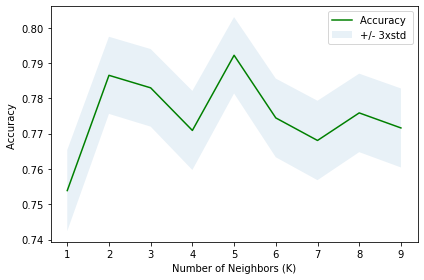

In [47]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [48]:
# Change k value to 5 since it gives the highest accuracy as shown above

In [49]:
# Create table that shows the sum for all the attributes each status type 
st_type=df.groupby(['status_type'], as_index=False).sum()
st_type

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,777373,68580,10951,766602,6197,2936,818,611,196
1,2,661478,1499544,269997,567198,82951,5714,4050,966,593
2,3,160156,13227,934,158968,570,428,40,141,9
3,4,23319,359,277,23286,19,12,2,0,0


In [50]:
#Set status type as the index
st_type_index = st_type.set_index('status_type', inplace=True)
st_type_index

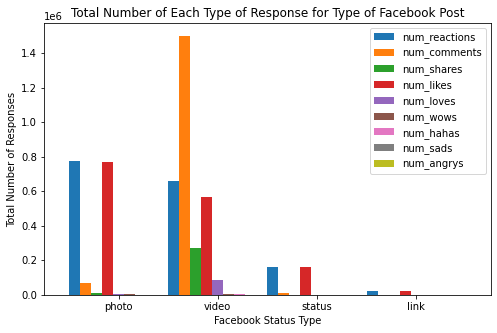

In [51]:
# Make a bar chart with this table showing number of each response for each type of Facebook post
st_type.plot(kind='bar', width=1, figsize=(8, 5))

plt.xlabel('Facebook Status Type') # add to x-label to the plot
plt.ylabel('Total Number of Responses') # add y-label to the plot
plt.title('Total Number of Each Type of Response for Type of Facebook Post') # add title to the plot

# Choose the position of each barplots on the x-axis
y_pos = [0,1,2,3]

# Create names on the x-axis
types= ('photo', 'video', 'status', 'link')

plt.xticks(y_pos, types, rotation=360)  # change x labels to text instead of numbers


plt.show()

In [52]:
'''
According to this data, it seems like video posts and then photo posts receive the most response on Facebook (shown in bar chart above).
Videos receive the most comments.
Photos receive the most reactions and likes.
'''

'\nAccording to this data, it seems like video posts and then photo posts receive the most response on Facebook (shown in bar chart above).\nVideos receive the most comments.\nPhotos receive the most reactions and likes.\n'

In [53]:
'''
Conclusions:
-The attributes we used in our models, including the number of reactions, comments, shares, likes, loves, wows, hahas, sads, 
and angrys that a Facebook post receives, were able to classify the type of Facebook post with a fairly high accuracy rate.

'''

'\nConclusions:\n-The attributes we used in our models, including the number of reactions, comments, shares, likes, loves, wows, hahas, sads, \nand angrys that a Facebook post receives, were able to classify the type of Facebook post with a fairly high accuracy rate.\n\n'